In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('E:\\Github\\Regression\\Fuel Consumption.csv',encoding='latin-1') # Loading Data

In [3]:
a # Seeing the file

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2 Rating,Smog
0,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26.0,252.0,4.0,3.0
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26.0,258.0,4.0,3.0
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31.0,210.0,5.0,3.0
4,2019,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,261.0,4.0,3.0
5,2019,Acura,RDX AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
6,2019,Acura,RDX AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
7,2019,Acura,RLX Hybrid,Mid-size,3.5,6.0,AM7,Z,8.4,8.2,8.4,34.0,196.0,6.0,7.0
8,2019,Acura,TLX,Compact,2.4,4.0,AM8,Z,10.0,7.1,8.7,32.0,205.0,6.0,3.0
9,2019,Acura,TLX A-SPEC,Compact,2.4,4.0,AM8,Z,10.2,7.4,8.9,32.0,209.0,5.0,3.0


In [4]:
a1=a[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] # Selecting Required columns and keeping them in new data frame

In [5]:
a1.describe() # Gives Stats Summary

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1022.000000,1022.000000,1022.000000,1022.000000
mean,3.110861,5.588063,10.857730,250.762231
std,1.320259,1.800961,2.705248,57.054017
min,1.000000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,9.100000,211.250000
50%,3.000000,6.000000,10.600000,247.500000
75%,3.600000,6.000000,12.500000,289.000000
max,8.000000,16.000000,22.200000,522.000000


In [6]:
a1.shape # Gives number of rows and columns Present

(1047, 4)

In [7]:
a1.isnull().sum() # Checking for Nulls

ENGINESIZE              25
CYLINDERS               25
FUELCONSUMPTION_COMB    25
CO2EMISSIONS            25
dtype: int64

In [8]:
a1.iloc[:,:]=a1.iloc[:,:].apply(lambda z:z.fillna(z.median())) # Replacing Nulls

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
a1.isnull().sum() # Checking for Nulls

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [10]:
a1.corr() # Checking Correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.923177,0.824510,0.843772
CYLINDERS,0.923177,1.000000,0.792508,0.819732
FUELCONSUMPTION_COMB,0.824510,0.792508,1.000000,0.936137
CO2EMISSIONS,0.843772,0.819732,0.936137,1.000000


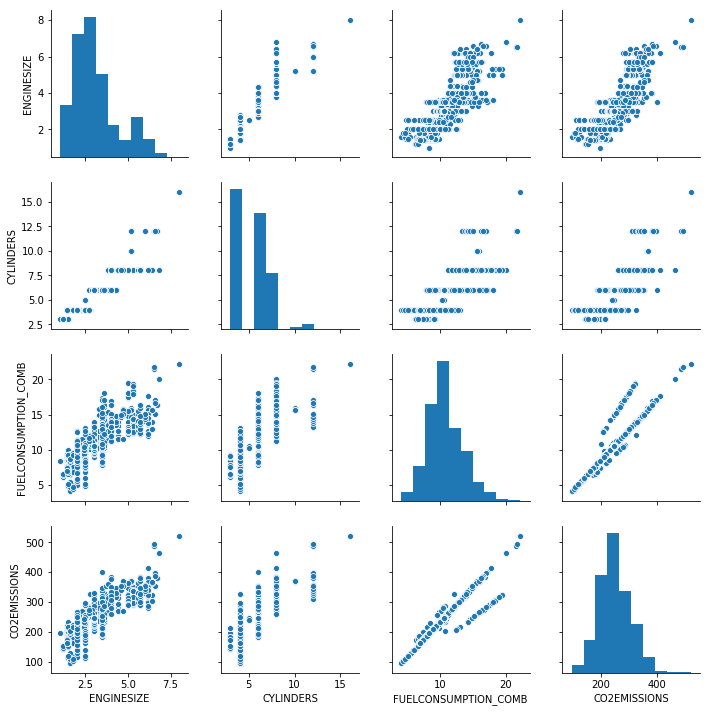

In [11]:
sns.pairplot(a1.iloc[:,:]) # Showing Correlation Plots

In [12]:
x=a1.loc[:,['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] # Taking Input data into seperate Data Frame

In [13]:
y=a1.loc[:,'CO2EMISSIONS'] # Taking output data into seperate Data Frame

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # Splitting Data Set

In [15]:
training=pd.concat([x_train,y_train],axis=1) # Combining Training Data set

In [16]:
training # Seeing Training Data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
629,3.5,6.0,11.1,268.0
257,5.7,8.0,12.9,302.0
442,2.0,4.0,7.1,167.0
534,5.0,8.0,13.3,313.0
33,2.0,4.0,8.7,204.0
740,3.0,6.0,12.1,282.0
870,3.0,6.0,10.5,246.0
249,6.2,8.0,15.1,352.0
1034,3.0,6.0,10.6,247.5
305,3.5,6.0,12.4,291.0


In [17]:
m1=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_COMB',data=training).fit() # Implementing Multiple Linear Regression

In [18]:
m1.summary()# Checking Summary of Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2206.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:47:06   Log-Likelihood:                -3159.8
No. Observations:                 732   AIC:                             6328.
Df Residuals:                     728   BIC:                             6346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               41.2597      3.257     12.666      0.000      34.865      47.655
ENGINESIZE               5.0832      1.419      3.582      0.000       2.297       7.869
CYLINDERS                3.5584      0.952      3.736      0.000       1.688       5.428
FUELCONSUMPTION_COMB    16.0060      0.458     34.929      0.000      15.106      16.906
==============================================================================
Omnibus:                      430.756   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.145
Skew:                          -2.562   Prob(JB):                         0.00
Kurtosis:                      12.905   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_pred=m1.predict(x_test) # Predicting output for test data

In [20]:
y_pred # Output

770    220.917576
691    269.326521
706    301.338445
775    200.109825
853    253.925327
84     233.117577
769    212.914595
716    278.930098
578    204.911614
143    325.326312
790    206.512210
269    348.209247
360    278.875287
0      205.344308
927    199.450245
841    253.925327
203    320.751408
380    236.263958
202    321.356177
411    311.147831
661    195.308036
174    317.323331
727    217.716383
46     217.716383
128    228.260977
863    313.428824
777    212.914595
405    317.550216
704    257.126520
383    239.465151
          ...    
729    204.911614
332    407.259232
924    224.118768
938    271.477075
532    266.730097
971    267.671114
831    323.876972
394    296.742465
286    277.879459
207    306.346043
597    231.516981
171    304.518561
852    247.522943
934    204.252034
503    268.687759
987    196.908632
993    212.914595
843    242.721154
547    219.749673
558    233.722345
767    200.109825
559    268.179436
329    317.625844
605    201.710421
948    227

In [21]:
comp=pd.concat([y_test,y_pred],axis=1) # Combining output of original test data with Predicted data

In [22]:
comp # Seeing both outputs

,CO2EMISSIONS,0
770,227.0,220.917576
691,263.0,269.326521
706,309.0,301.338445
775,197.0,200.109825
853,257.0,253.925327
84,227.0,233.117577
769,214.0,212.914595
716,275.0,278.930098
578,206.0,204.911614
143,328.0,325.326312


In [23]:
comp.rename(columns={0:'PREDICTED VALUE'},inplace=True) # Renaming the Column

In [24]:
comp # Seeing the predicted output with original test output

,CO2EMISSIONS,PREDICTED VALUE
770,227.0,220.917576
691,263.0,269.326521
706,309.0,301.338445
775,197.0,200.109825
853,257.0,253.925327
84,227.0,233.117577
769,214.0,212.914595
716,275.0,278.930098
578,206.0,204.911614
143,328.0,325.326312
